# Machine Learning Online Class - Exercise 2: Logistic Regression

For this exercise, you will not need to change any code in this file,
or any other files other than those mentioned above.




In [1]:
# Initialization
from ex2func import predict,plotData
from ex2funcReg import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


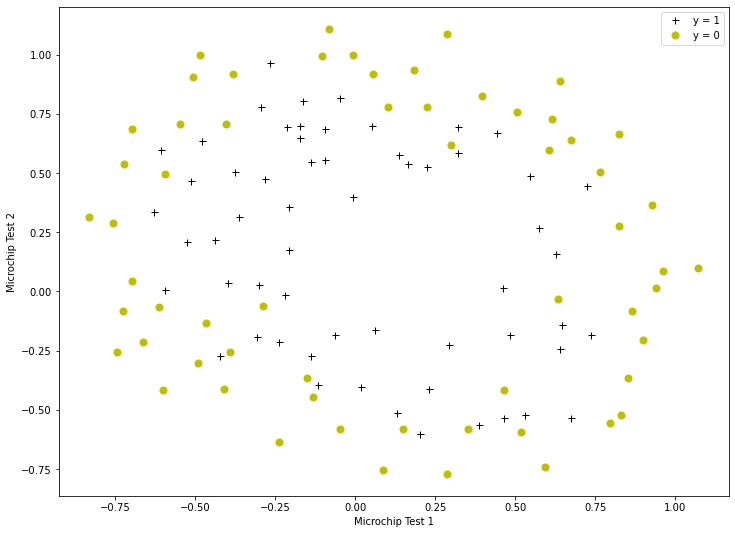

In [2]:
#Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data=np.loadtxt('ex2data2.txt',delimiter=',')
X,y=data[:,[0,1]],data[:,2]
plt.figure()
plotData(X,y)
# Labels and Legend
plt.legend(['y = 1', 'y = 0'])
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.show()

## Part 1: Regularized Logistic Regression
In this part, you are given a dataset with data points that are not
linearly separable. However, you would still like to use logistic
regression to classify the data points.

To do so, you introduce more features to use -- in particular, you add
polynomial features to our data matrix (similar to polynomial
regression).



In [3]:
# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X=mapFeature(X[:,0],X[:,1])
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1],))
# Set regularization parameter lambda to 1
l = 1
# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, l)
print('Cost at initial theta (zeros): %f\n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [4]:
# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],))
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('\nCost at test theta (with lambda = 10): %f\n' % cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print(grad[1:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at test theta (with lambda = 10): 3.206882

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



## Part 2: Regularization and Accuracies
Optional Exercise:
In this part, you will get to try different values of lambda and
see how regularization affects the decision coundart

Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? How does
the training set accuracy vary?





(50, 50)


C:\Users\hanlu\Desktop\ML\ex2\Python\ex2funcReg.py:66: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(u, v, z, levels=[0, 0], linewidth=2)


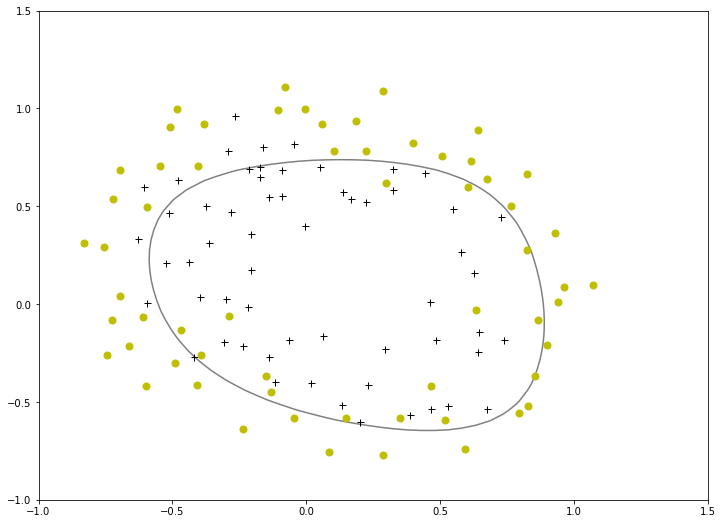

In [6]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1],))
l=1
# Optimize
result=opt.minimize(fun=costfunc,x0=initial_theta,args=(X,y,l),method='TNC',jac=gradfunc)
theta,cost=result.x,result.fun
# Plot Boundary
plotDecisionBoundary(theta, X, y)